### 1. Importing Libraries 

In [3]:
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

### 2. Importing and Exploration of the dataset

In [5]:
# load tips data:

df = sns.load_dataset('tips')

In [7]:
# # showing the first rows of the dataset:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# To check the Dimensions of the dataset:
df.shape

(244, 7)

In [10]:
# Checking the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [12]:
# Checking the datatypes of the data:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [13]:
# Summary Statistics for Numerical data:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### 3. Missing Values

In [16]:
# use isnull().sum() to check for missing values 
df.isnull().sum() 

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no missing values in the data. 

If there are missing values in the data then either impute these missing values with median or mean for the numerical datatype or can impute using mode for categorical variables. 

There is also an inbuilt function in Sci-kit Learn library called Iterative Imputer that can be called to impute the missing values. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

----------------

### 4. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.

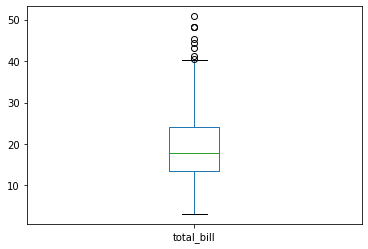

In [20]:
# For Total_bill 
df['total_bill'].plot(kind='box')
plt.show()

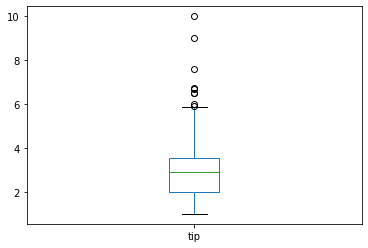

In [21]:
# For Total_bill 
df['tip'].plot(kind='box')
plt.show()

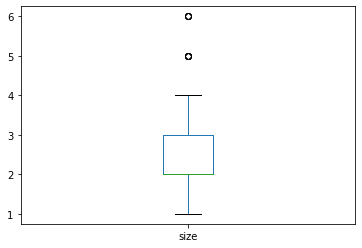

In [22]:
# For Total_bill 
df['size'].plot(kind='box')
plt.show()

We can see that there are outliers present in all Total_bill, tip and size. To treat for outliers can either cap the values or transform the data. Shall demonstrate both the approaches here. 

### 5. Transformation

### 5a. SQRT transformation 

In [25]:
df['SQRT_TB'] = df['total_bill']**0.5

In [26]:
df['sqrt tb'] = np.sqrt(df['total_bill'])

In [27]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,SQRT_TB,sqrt tb
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,4.121893
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,3.215587
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,4.583667
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,4.866210
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,4.958831


In [29]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.total_bill.skew()))
print("The kurtosis of the original data is {}".format(df.total_bill.kurt()))

print('')

print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_TB.skew()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_TB.kurt()))

The skewness of the original data is 1.1332130376158205
The kurtosis of the original data is 1.2184840156638854

The skewness of the SQRT transformed data is 0.5661281592596766
The kurtosis of the SQRT transformed data is 0.19520953466627722


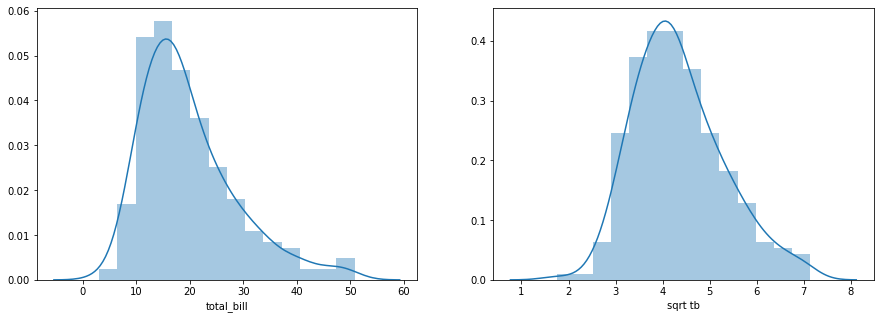

In [30]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['total_bill'], ax=axes[0])
sns.distplot(df['sqrt tb'], ax=axes[1])

plt.show()


### Result:

The Total Bill was right skewed earlier. The skewness and kurtosis as reduced significantly. Though the transformed SQRT total bill on the right graph still has some positive right tailed skewness.

### 5b. Log Transformation

In [31]:
df['Log Tb'] = np.log(df['total_bill'])

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,SQRT_TB,sqrt tb,Log Tb
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,4.958831,3.202340


In [33]:
print("The skewness of the original data is {}".format(df.total_bill.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_TB.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log Tb'].skew()))

print('')


print("The kurtosis of the original data is {}".format(df.total_bill.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_TB.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['Log Tb'].kurt()))

The skewness of the original data is 1.1332130376158205
The skewness of the SQRT transformed data is 0.5661281592596766
The skewnss of the LOG transformed data is -0.11623079290253824

The kurtosis of the original data is 1.2184840156638854
The kurtosis of the SQRT transformed data is 0.19520953466627722
The kurtosis of the LOG transformed data is 0.4734793671474513


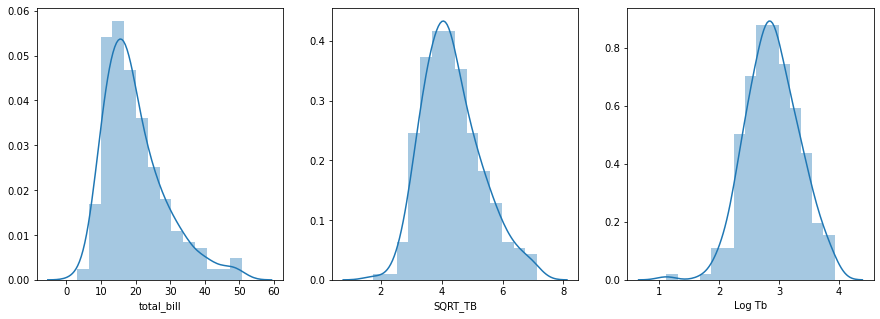

In [34]:
# plot the graph:

fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['total_bill'], ax=axes[0])
sns.distplot(df['SQRT_TB'], ax=axes[1])
sns.distplot(df['Log Tb'], ax=axes[2])

plt.show()

### Result:

Log Transformation made the total bill left skewed and more peaked.

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.m

In [35]:
## Using Lambda function :

df['LOG_TB'] = df['total_bill'].apply(lambda x:np.log(x))

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,SQRT_TB,sqrt tb,Log Tb,LOG_TB
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,4.121893,2.832625,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,3.215587,2.336020,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,4.583667,3.044999,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,4.866210,3.164631,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,4.958831,3.202340,3.202340


There are other transformations available also called BoxCox. There is an inbuilt function in Sci-kit Learn library called PowerTransformer for this which can also be called to transform the data. We'll see how it works below. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html


In [38]:
from sklearn.preprocessing import PowerTransformer

In [39]:
# loading tips data:

df1 = sns.load_dataset('tips')

In [47]:
# Seprating Numerical and Categorical features:

num_x = df1.dtypes[df1.dtypes !='category'].index.to_list()

cat_x = df1.dtypes[df1.dtypes =='category'].index.to_list()

In [48]:
# Numerical and Categorical datasets:
num_df = df1[num_x]
cat_df = df1[cat_x]

In [53]:
# Step 1: import PowerTransformer

# Step 2: creating object of that class:
PT = PowerTransformer(method='box-cox')

# Step 3: Use the function IterativeImputer to use on the dataset:
x_tranform = PT.fit_transform(num_df)


The x_transform is an array and can be further used to build the model. 

-----------

### Outliers Treatment

### 1) Z-Score approach to treat Outliers:

All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed

In [55]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,SQRT_TB,sqrt tb,Log Tb,LOG_TB
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,4.121893,2.832625,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,3.215587,2.336020,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,4.583667,3.044999,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,4.866210,3.164631,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,4.958831,3.202340,3.202340


In [56]:
# 'SciPy' is used to perform scientific computations
import scipy.stats as stats

#### Using SciPy Library to calculate the Z-Score:

In [57]:
# Creating new variable with Z-score of each record:
df['ZTB'] = stats.zscore(df['total_bill'])

#### Manually computing the Z-score:

In [68]:
avg_total_bill = df['total_bill'].mean()
avg_total_bill

19.785942622950824

In [69]:
std_total_bill = df['total_bill'].std()
std_total_bill

8.902411954856856

In [71]:
# Step 1 : transform using Z-score
df['Z_Score_Total_Bill'] = (df['total_bill'] - avg_total_bill )/std_total_bill

In [72]:
# count of -3 to +3 ZTB score: lower limit

df[df['ZTB'] < - 3]

,total_bill,tip,sex,smoker,day,time,size,SQRT_TB,sqrt tb,Log Tb,LOG_TB,ZTB,Z_Score_Total_Bill


In [73]:
# lower limit:
df[df['ZTB'] > 3 ]

,total_bill,tip,sex,smoker,day,time,size,SQRT_TB,sqrt tb,Log Tb,LOG_TB,ZTB,Z_Score_Total_Bill
59,48.27,6.73,Male,No,Sat,Dinner,4,6.947661,6.947661,3.876810,3.876810,3.206166,3.199589
156,48.17,5.00,Male,No,Sun,Dinner,6,6.940461,6.940461,3.874736,3.874736,3.194910,3.188356
170,50.81,10.00,Male,Yes,Sat,Dinner,3,7.128113,7.128113,3.928093,3.928093,3.492068,3.484905
212,48.33,9.00,Male,No,Sat,Dinner,4,6.951978,6.951978,3.878052,3.878052,3.212919,3.206329


In [74]:
# Combined Lower limit and Upper limit:

df[(df['ZTB']<-3) | (df['ZTB']>3)]

,total_bill,tip,sex,smoker,day,time,size,SQRT_TB,sqrt tb,Log Tb,LOG_TB,ZTB,Z_Score_Total_Bill
59,48.27,6.73,Male,No,Sat,Dinner,4,6.947661,6.947661,3.876810,3.876810,3.206166,3.199589
156,48.17,5.00,Male,No,Sun,Dinner,6,6.940461,6.940461,3.874736,3.874736,3.194910,3.188356
170,50.81,10.00,Male,Yes,Sat,Dinner,3,7.128113,7.128113,3.928093,3.928093,3.492068,3.484905
212,48.33,9.00,Male,No,Sat,Dinner,4,6.951978,6.951978,3.878052,3.878052,3.212919,3.206329


In [75]:
# count of outliers:

df[(df['ZTB']<-3) | (df['ZTB']>3)].shape[0]

4

In [76]:
### Cleaned Data: without outliers so z>-3 and z< +3

df2= df[(df['ZTB']>-3) & (df['ZTB']<3)].reset_index()
df2.head()

,index,total_bill,tip,sex,smoker,day,time,size,SQRT_TB,sqrt tb,Log Tb,LOG_TB,ZTB,Z_Score_Total_Bill
0,0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,4.121893,2.832625,2.832625,-0.314711,-0.314066
1,1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,3.215587,2.336020,2.336020,-1.063235,-1.061054
2,2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,4.583667,3.044999,3.044999,0.137780,0.137497
3,3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,4.866210,3.164631,3.164631,0.438315,0.437416
4,4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,4.958831,3.202340,3.202340,0.540745,0.539635


In [77]:
df.shape

(244, 13)

In [78]:
df2.shape

(240, 14)

In [79]:
print("The skewness of Original Data is {} ".format(df.total_bill.skew()))
print('The skewness of Z-Score Cleaned Data is {} '.format(df2.total_bill.skew()))

print('')

print('The kurtosis of Original Data is {} '.format(df.total_bill.kurt()))
print('The kurtosis of Z-Score Cleaned Data is {} '.format(df2.total_bill.kurt()))

The skewness of Original Data is 1.1332130376158205 
The skewness of Z-Score Cleaned Data is 0.9148510261489988 

The kurtosis of Original Data is 1.2184840156638854 
The kurtosis of Z-Score Cleaned Data is 0.5355590055930715 


### Inference:

The skewness and Kurtosis both have reduced and are close to zero. The Total Bill has moved more towards zero.

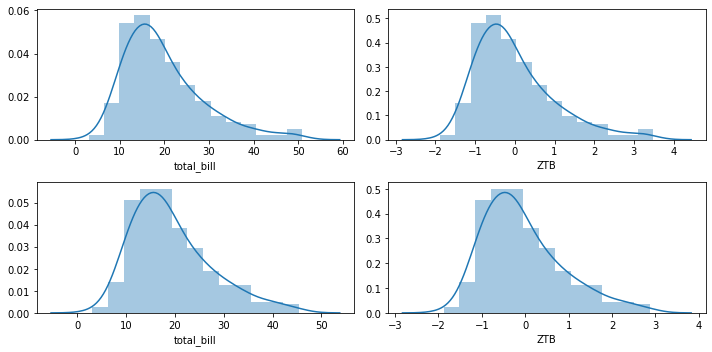

In [80]:
### Plotting of the graph:

fig, axes = plt.subplots(2,2,figsize=(10,5))

sns.distplot(df['total_bill'], ax=axes[0,0])
sns.distplot(df['ZTB'], ax = axes[0,1])
sns.distplot(df2['total_bill'], ax= axes[1,0])
sns.distplot(df2['ZTB'], ax=axes[1,1])

plt.tight_layout()
plt.show()

## Inference:

The slope has decreased after removing the outliers. Earlier it was longer slope and now it is shorter. The bump of the outlier has removed.

Both the Skewness and Kurtosis has decreased and  has become more less skewed and bump has gone.

In [81]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
df1.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

-----------

### 2) IQR Method to treat Outliers:

All the values below Q1 - 1.5*IQR and values above Q3 + 1.5*IQR are outliers and can be removed.

In [85]:
# finding the Quantiles:

Q1 = df1.total_bill.quantile(0.25)
Q2 = df1.total_bill.quantile(0.50)
Q3 = df1.total_bill.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

-2.8224999999999945

40.29749999999999

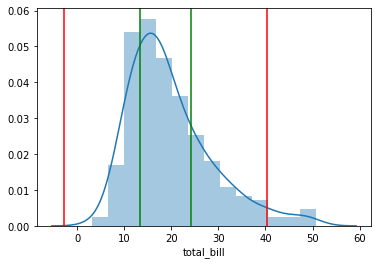

In [86]:
## Plot

sns.distplot(df1.total_bill)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [87]:
# Find count of Outliers wrt IQR

df1[(df1.total_bill<LC) | (df1.total_bill>UC)].reset_index(drop=True)

,total_bill,tip,sex,smoker,day,time,size
0,48.27,6.73,Male,No,Sat,Dinner,4
1,44.30,2.50,Female,Yes,Sat,Dinner,3
2,41.19,5.00,Male,No,Thur,Lunch,5
3,48.17,5.00,Male,No,Sun,Dinner,6
4,50.81,10.00,Male,Yes,Sat,Dinner,3
5,45.35,3.50,Male,Yes,Sun,Dinner,3
6,40.55,3.00,Male,Yes,Sun,Dinner,2
7,43.11,5.00,Female,Yes,Thur,Lunch,4
8,48.33,9.00,Male,No,Sat,Dinner,4


In [88]:
df1[(df1.total_bill<LC) | (df1.total_bill>UC)].shape[0]

9

In [89]:
## Store the clean data wrt IQR and then find skewness, kurtosis and dis

df3 = df1[(df1.total_bill>LC) & (df1.total_bill<UC)]
df3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
df3.shape

(235, 7)

In [91]:
print("The skewness of Original Data is {} ".format(df.total_bill.skew()))
print('The skewness of Z-Score Cleaned Data is {} '.format(df2.total_bill.skew()))
print('The skewness of IQR Cleaned Data is {} '.format(df3.total_bill.skew()))

print('')

print('The kurtosis of Original Data is {} '.format(df.total_bill.kurt()))
print('The kurtosis of Z-Score Cleaned Data is {} '.format(df2.total_bill.kurt()))
print('The kurtosis of IQR Cleaned Data is {} '.format(df3.total_bill.kurt()))

The skewness of Original Data is 1.1332130376158205 
The skewness of Z-Score Cleaned Data is 0.9148510261489988 
The skewness of IQR Cleaned Data is 0.7255976389840281 

The kurtosis of Original Data is 1.2184840156638854 
The kurtosis of Z-Score Cleaned Data is 0.5355590055930715 
The kurtosis of IQR Cleaned Data is 0.050898514819063934 


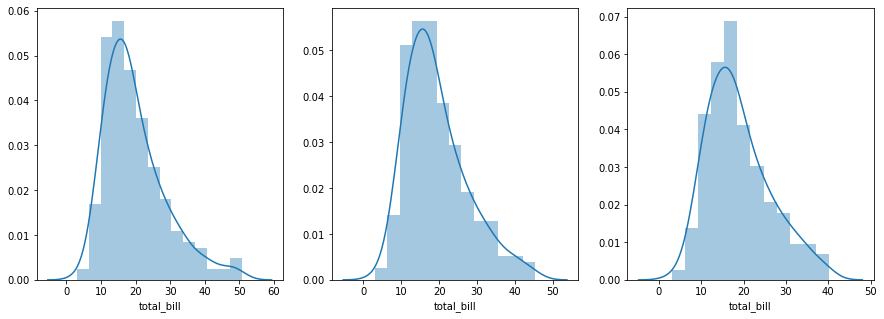

In [92]:
# plotting:

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df1.total_bill, ax=axes[0])
sns.distplot(df2.total_bill, ax=axes[1])
sns.distplot(df3.total_bill, ax=axes[2])

plt.show()

### Inference:

The height at value 40 is more now & is concentrated.

In the IQR cleaned data ---> more 0 hence more closer to Mesokurtoic(normal data) i.e. is less skewed. 
The peakedness has reduced i.e is less Kurotic
The slope is all the more shorter


IQR method is completely positional and Z-Score one is the calculated one.

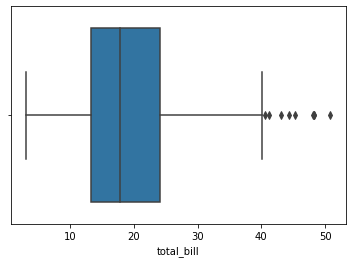

In [93]:
## Box Plot for total_bill --- based on IQR Method

sns.boxplot(df1.total_bill)
plt.show()

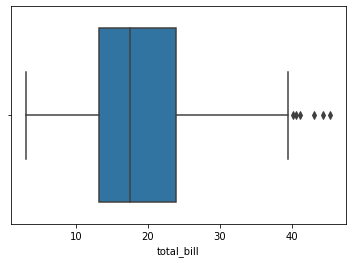

In [94]:
# Box Plot for total_bill --- based on Z-score cleaned data 

sns.boxplot(df2.total_bill)
plt.show()

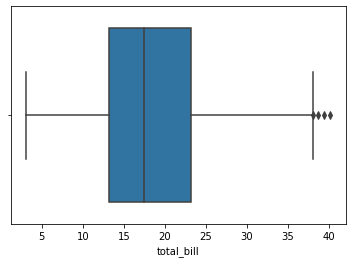

In [95]:
# Box Plot for total_bill --- based on IQR cleaned data 

sns.boxplot(df3.total_bill)
plt.show()

-------------------

### 6. Scaling the Numerical Features

There are two ways to scale the data: 

1) Normalization (i.e Z-Score)\
2) Min Max Scalar

Both can by done manually as well as have in-built functions in sklearn. Will demonstrate both.

### 6a. Normalizing (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

#### Manually:

In [100]:
avg_total_bill = df1['total_bill'].mean()
avg_total_bill

19.785942622950824

In [101]:
std_total_bill = df1['total_bill'].std()
std_total_bill

8.902411954856856

In [102]:
# Step 1 : transform using Z-score
df1['Z_Score_Total_Bill'] = (df1['total_bill'] - avg_total_bill )/std_total_bill

In [104]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,Z_Score_Total_Bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635


In [106]:
print("The skewness for the original data is {}.".format(df1.total_bill.skew()))
print("The kurtosis for the original data is {}.".format(df1.total_bill.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df1.Z_Score_Total_Bill.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df1.Z_Score_Total_Bill.kurt()))

The skewness for the original data is 1.1332130376158205.
The kurtosis for the original data is 1.2184840156638854.

The skewness for the Zscore Scaled column is 1.1332130376158207.
The kurtosis for the Zscore Scaled columns is 1.2184840156638828.


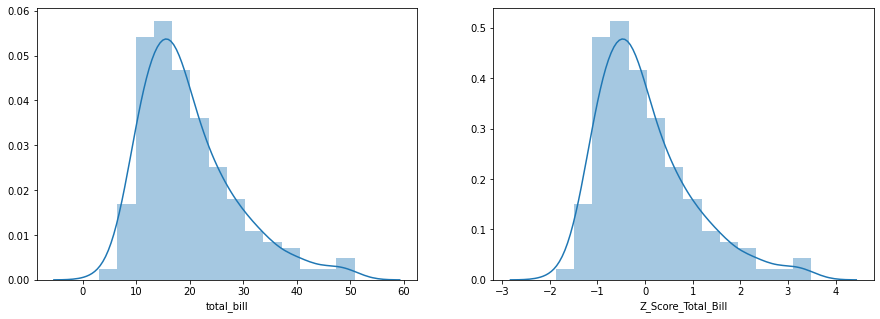

In [107]:
# Distribution of the columns

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(df1['total_bill'], ax=axes[0])
sns.distplot(df1['Z_Score_Total_Bill'], ax=axes[1])

plt.show()

The only difference between the two curves is of the Range on the x-axis. The impact of scaling on data is:
Skewness, Kurtosis and Distribution all remain same.

The need for Scaling is :

1) Comparison between variables is easier\
2) Computation power is more efficient and less time consuming.

#### By SkLearn:

Dpcumentation for Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [115]:
# loading tips data:

df_tips = sns.load_dataset('tips')

tips_num = df_tips.select_dtypes([np.number])

In [111]:
from sklearn.preprocessing import StandardScaler

In [119]:
SS = StandardScaler()

scaled_x = SS.fit_transform(tips_num)
scaled_x

array([[-3.14711305e-01, -1.43994695e+00, -6.00192629e-01],
       [-1.06323531e+00, -9.69205340e-01,  4.53382921e-01],
       [ 1.37779900e-01,  3.63355539e-01,  4.53382921e-01],
       [ 4.38315103e-01,  2.25754144e-01, -6.00192629e-01],
       [ 5.40744704e-01,  4.43019505e-01,  1.50695847e+00],
       [ 6.19536705e-01,  1.23965916e+00,  1.50695847e+00],
       [-1.23995452e+00, -7.22971264e-01, -6.00192629e-01],
       [ 7.98507107e-01,  8.81527488e-02,  1.50695847e+00],
       [-5.34203307e-01, -7.51939979e-01, -6.00192629e-01],
       [-5.63468908e-01,  1.67816714e-01, -6.00192629e-01],
       [-1.07111451e+00, -9.32994446e-01, -6.00192629e-01],
       [ 1.74175992e+00,  1.44968234e+00,  1.50695847e+00],
       [-4.91430507e-01, -1.03438495e+00, -6.00192629e-01],
       [-1.52624903e-01,  1.24660453e-03,  1.50695847e+00],
       [-5.57840908e-01,  1.57309619e-02, -6.00192629e-01],
       [ 2.01939101e-01,  6.67527044e-01, -6.00192629e-01],
       [-1.06436091e+00, -9.61963161e-01

### 6b. Min_Max Scaler

Scales the data using the formula (x - min)/(max - min)

#### Manually:

In [122]:
min_total_bill = df1.total_bill.min()
min_total_bill

3.07

In [123]:
max_total_bill = df1.total_bill.max()
max_total_bill

50.81

In [124]:
df1['Min_Max_TB'] = (df1['total_bill'] - min_total_bill)/ (max_total_bill - min_total_bill)

In [125]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,Z_Score_Total_Bill,Min_Max_TB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635,0.450775


In [126]:
print("The skewness for the original data is {}.".format(df1.total_bill.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df1.Z_Score_Total_Bill.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df1.Min_Max_TB.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df1.total_bill.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df1.Z_Score_Total_Bill.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df1.Min_Max_TB.kurt()))

The skewness for the original data is 1.1332130376158205.
The skewness for the Zscore Scaled column is 1.1332130376158207.
The skewness for the Min Max Scaled Data is 1.1332130376158203.

The kurtosis for the original data is 1.2184840156638854.
The kurtosis for the Zscore Scaled columns is 1.2184840156638828.
The kurtosis for the Min Max Scaled Data is 1.2184840156638836.


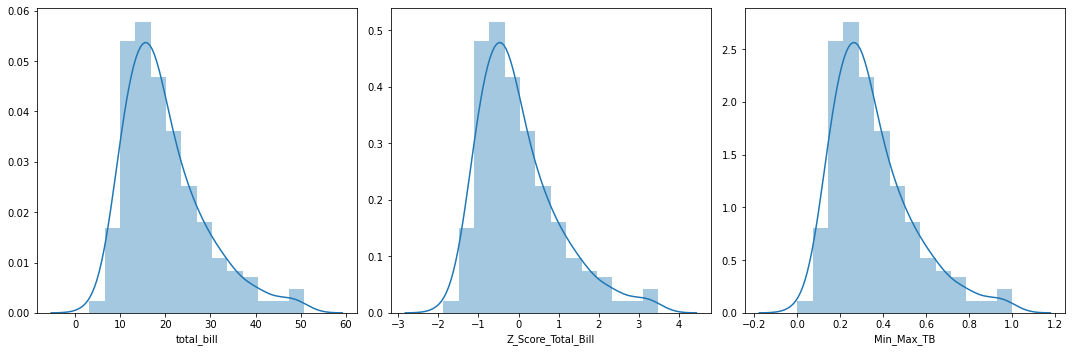

In [127]:
# Distribution of the columns

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df1['total_bill'], ax=axes[0])
sns.distplot(df1['Z_Score_Total_Bill'], ax=axes[1])
sns.distplot(df1['Min_Max_TB'], ax=axes[2])

plt.tight_layout()
plt.show()

#### By Sklearn:

Documentation for Min Max Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(tips_num)
MinMaxScaled

array([[0.29157939, 0.00111111, 0.2       ],
       [0.1522832 , 0.07333333, 0.4       ],
       [0.3757855 , 0.27777778, 0.4       ],
       [0.43171345, 0.25666667, 0.2       ],
       [0.45077503, 0.29      , 0.6       ],
       [0.46543779, 0.41222222, 0.6       ],
       [0.11939673, 0.11111111, 0.2       ],
       [0.49874319, 0.23555556, 0.6       ],
       [0.25073314, 0.10666667, 0.2       ],
       [0.24528697, 0.24777778, 0.2       ],
       [0.15081693, 0.07888889, 0.2       ],
       [0.67427734, 0.44444444, 0.6       ],
       [0.25869292, 0.06333333, 0.2       ],
       [0.32174277, 0.22222222, 0.6       ],
       [0.24633431, 0.22444444, 0.2       ],
       [0.38772518, 0.32444444, 0.2       ],
       [0.15207373, 0.07444444, 0.4       ],
       [0.27691663, 0.30111111, 0.4       ],
       [0.29116045, 0.27777778, 0.4       ],
       [0.36824466, 0.26111111, 0.4       ],
       [0.31105991, 0.34222222, 0.2       ],
       [0.36070381, 0.19444444, 0.2       ],
       [0.

### Few things to keep in mind:

1) After cleaning of outliers, when plotting Boxplot again on new data, that data also could have outliers as well cause for the new data we would have new Q1, Q2, Q3 then new box plot with new outliers.


2) After applying transformation, skewness is decreasing or not then also could have outliers removed as values comes closer or also it can't have outliers removed post transformation.


3) With Scaling all three - Skewness, Kurtosis and distribution remain same so there is no impact on outliers as well.

------------------

### 7. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using: 

1) pd.get_dummies\
2) sklearn's in-built function of OneHotEncoder and LabelEncoder

In [138]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [144]:
cat_tips = df_tips.select_dtypes(exclude=[np.number])

#### 1) pd.get_dummies approach:

In [145]:
dummy_cat = pd.get_dummies(cat_tips, drop_first = True)
dummy_cat

# drop_first = True drops the first column for each feature

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1
...,...,...,...,...,...,...
239,0,1,0,1,0,1
240,1,0,0,1,0,1
241,0,0,0,1,0,1
242,0,1,0,1,0,1


### 2. OneHot Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [149]:
from sklearn.preprocessing import OneHotEncoder

In [152]:
OE_tips = OneHotEncoder(drop ='first').fit(cat_tips)
OE_tips.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [154]:
# transform any new values to Dummy variables via OneHot Encoder
OE_tips.transform([['Female','No', 'Sat', 'Lunch'], ['Male','Yes', 'Thur', 'Dinner']]).toarray()

array([[0., 0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0.]])

In [155]:
# Inverse transform to get original values from the dummy variables:
OE_tips.inverse_transform([[0., 0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0.]])

array([['Female', 'No', 'Sat', 'Lunch'],
       ['Male', 'Yes', 'Thur', 'Dinner']], dtype=object)

In [157]:
OE_tips.get_feature_names(['sex', 'smoker','day','time'])

array(['sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Lunch'], dtype=object)

### 3. Label Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [158]:
from sklearn.preprocessing import LabelEncoder

In [160]:
LE = LabelEncoder()

LE_tips = LE.fit(cat_tips['day'])

In [161]:
LE_tips.classes_

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [163]:
# transform any new values to Dummy variables via Label Encoder
LE_tips.transform(['Sat','Thur','Fri','Sun'])

array([1, 3, 0, 2], dtype=int64)

In [164]:
# Inverse transform to get original values from the dummy variables:
LE_tips.inverse_transform([1,2,3,0])

array(['Sat', 'Sun', 'Thur', 'Fri'], dtype=object)

----------------

### 8. Training and Testing data

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [166]:
from sklearn.model_selection import train_test_split

In [226]:
# laod iris dataset:

iris = pd.read_csv('11_Iris.csv', index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [227]:
## Splitting for X and Y variables:

Y = iris['Species']
X = iris.drop('Species', axis=1)

In [228]:
# Independent Variable

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [229]:
# Dependent or Target Variable

Y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [230]:
## Splitting dataset into 70% Training and 30% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state =0)

# random_state ---> is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for 

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (105, 4)
The shape of X_test is: (45, 4)

The shape of Y_train is: (105,)
The shape of Y_test is: (45,)


To statistically test if the train and test representative of the overall data, would compute the Median for the independent variables for both the test and train sets.

In [231]:
# median for x_train
median_x_train = X_train.median()

# median for x_test
median_x_test = X_test.median()

In [232]:
print('The median for X Train variables is:')
median_x_train

The median for X Train variables is:


SepalLengthCm    5.8
SepalWidthCm     3.0
PetalLengthCm    4.4
PetalWidthCm     1.3
dtype: float64

In [233]:
print('The median for X Test variables is:')
median_x_test

The median for X Test variables is:


SepalLengthCm    5.8
SepalWidthCm     3.0
PetalLengthCm    4.3
PetalWidthCm     1.3
dtype: float64

### Conclusion:

Based on the above result, we can conclude statistically that the train and test representative of the overall data as the median for both x_train and x_test are similar.

-----------------

### 9. PipeLining the entire workflow

We can build a pipeline using which can impute missings values, transform and scale the data in one piece of code. These steps must ideally be done post splitting the data into train and test so as to avoid data leakages.

Documemtation for this: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Refer this for more illustration on Pipeline: https://towardsdatascience.com/clean-efficient-data-pipelines-with-pythons-sklearn-2472de04c0ea

In [191]:
### Imputation of Missing Values using Iterative Imputer:

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  

# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [238]:
# Data pre-processing, model building, feature engineering

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

pipe = Pipeline((
("IT", IterativeImputer()),
("PT",PowerTransformer()),
("SC", StandardScaler()),
("SKB",SelectKBest(f_classif,k=3)),         # selecting the best 3 key features (i.e automating the feature selection)
("LR", LogisticRegression()),               # applying Logistic Regression algorithm    
))

# fitting the data to pipeline created:
pipe.fit(X_train, Y_train)

print("Testing Accuracy is: ", pipe.score(X_test, Y_test))
print('')
print("Training Accuracy is: ",pipe.score(X_train, Y_train))

Testing Accuracy is:  0.9777777777777777

Training Accuracy is:  0.9619047619047619


In [240]:
y_pred = pipe.predict(X_test) 

In [242]:
#metrics calculation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,cohen_kappa_score

### 10. Model Evaluation

In [244]:
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy Score:',accuracy)

Accuracy Score: 0.9777777777777777


In [245]:
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [246]:
print('Classification Report:')
print(classification_report(Y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [247]:
print('Cohen Kappa Score is:' ,cohen_kappa_score(Y_test, y_pred))

Cohen Kappa Score is: 0.966190833959429


### Inference of Cohen Kappa Score: 
The Kappa Statistic , which is a number between -1 and 1. The maximum value means complete agreement; zero or lower means chance agreement. The above score of 0.9662 suggests that there is higher chance agreement.

### Cross Validation

It’s a model validation technique for assessing how the results of a statistical analysis will generalize to an  independent data set. Mainly used in settings where the goal is prediction and one wants to estimate how  accurately a model will perform in practice. 

The goal of cross-validation is to define a data set to test the  model in the training phase (i.e. validation data set) in order to limit problems like over fitting, and get an  insight on how the model will generalize to an independent data set. 
Examples: leave-one-out cross validation, K-fold cross validation 

In [250]:
# Evaluating models using Cross Validation

from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe, X_train, Y_train, cv=10, scoring='accuracy')
print(scoreslr)

[0.90909091 0.90909091 0.90909091 1.         1.         1.
 1.         0.9        1.         0.9       ]


In [252]:
print("Average Accuracy of the model")
print(np.mean(scoreslr))

print('')

print("SD of accuracy of the model")
print(np.std(scoreslr,ddof=1))

Average Accuracy of the model
0.9527272727272728

SD of accuracy of the model
0.04994027654412768


In [253]:
# 95% Confidence Interval of Accuracy

xbar = np.mean(scoreslr)
n=10

s = np.std(scoreslr,ddof=1)
se = s/np.sqrt(n)

print('The 95% Confidence Interval of Accuracy is: ')
stats.t.interval(0.95,df=n-1,loc=xbar,scale=se)

The 95% Confidence Interval of Accuracy is: 


(0.9170021510162498, 0.9884523944382957)

This is only the base model. We can apply advanced Classification models starting from Decision Tree, Ensemble Methods, KNN to XGBoost to improve the model accuracy and stability.

------------------